In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
df = pd.read_csv("Data/electricity-access.csv", encoding='utf-8')

In [81]:
# Rename columns for easier access
df.rename(columns={"With access to electricity": "Access_Percentage",
                   "Without access to electricity": "No_Access_Percentage"}, inplace=True)

In [82]:
# Check for missing values
nan_df = pd.DataFrame(df.isnull().sum())
nan_df.columns = ["IsNull"]

In [83]:
nan_df

,IsNull
Entity,0
Code,0
Year,0
Access_Percentage,0
No_Access_Percentage,0


In [84]:
# Fill missing codes with empty string to avoid errors in mapping
df['Code'] = df['Code'].fillna('')

In [85]:
# Convert 'Year' to integer
df['Year'] = df['Year'].astype(int)

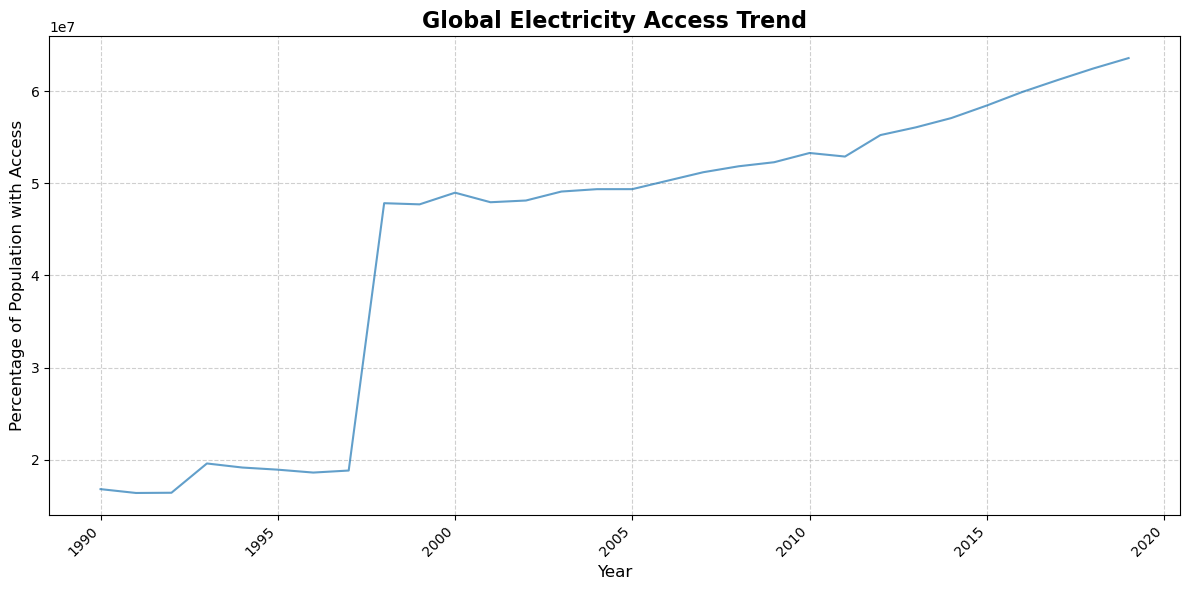

In [86]:
# Group by year and calculate the global average
global_trend = df.groupby("Year")["Access_Percentage"].mean().reset_index()

# Plot the global trend
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Access_Percentage", data=global_trend, alpha=0.7, linewidth=1.5)
plt.title("Global Electricity Access Trend", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population with Access", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [87]:
# Select some regions for comparison
regions = ["Thailand", "Ukraine", "United Arab Emirates", "United Kingdom", "United States"]

In [88]:
len(regions)

5

In [89]:
# Filter the data for selected regions
regional_trends = df[df["Entity"].isin(regions)]

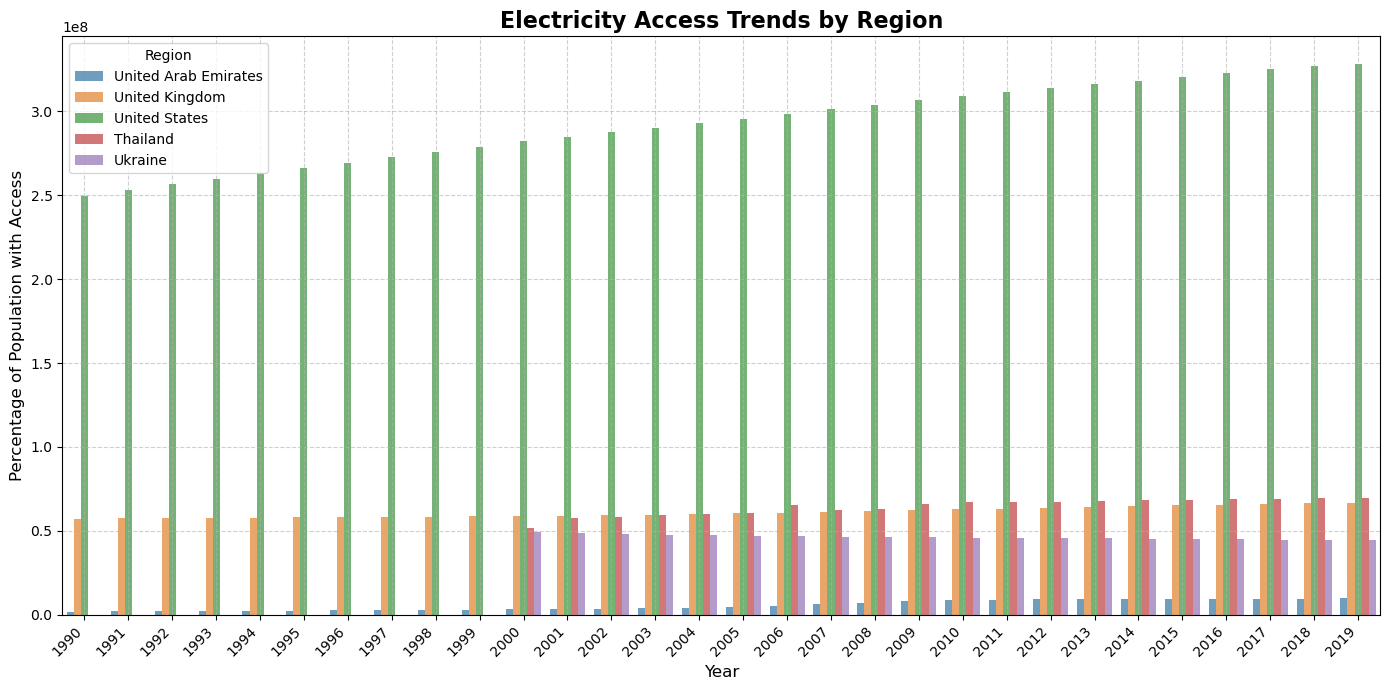

In [90]:
# Plot regional trends
plt.figure(figsize=(14, 7))
sns.barplot(x="Year", y="Access_Percentage", hue="Entity", data=regional_trends, alpha=0.7, linewidth=1.5)
plt.title("Electricity Access Trends by Region", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population with Access", fontsize=12)
plt.legend(title="Region")
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [91]:
# Filter data for the year 2020
data_2020 = df[df["Year"] == 2020]

In [92]:
# Bar chart for access in 2020 across selected regions
data_2020_regions = data_2020[data_2020["Entity"].isin(regions)]

In [93]:
# Bar chart showing change in India's access over time
india_data = df[df["Entity"] == "India"]

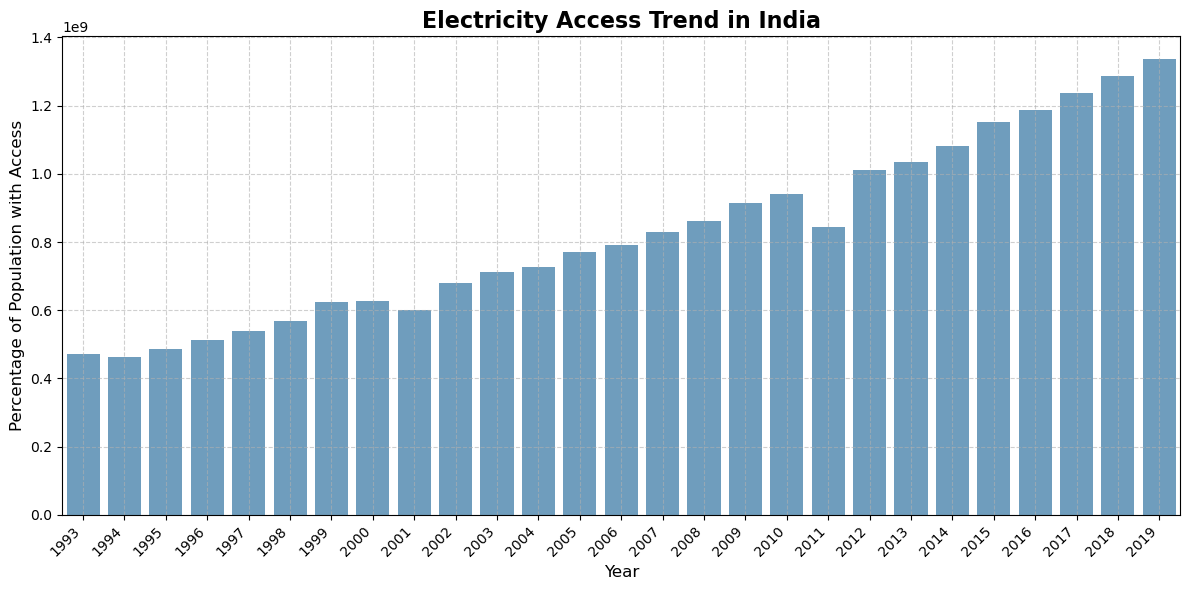

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="Access_Percentage", data=india_data, alpha=0.7, linewidth=1.5)
plt.title("Electricity Access Trend in India", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population with Access", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [95]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [96]:
# Filter for global data
global_df = df[df["Entity"] == "United States"]

In [97]:
global_df.columns

Index(['Entity', 'Code', 'Year', 'Access_Percentage', 'No_Access_Percentage'], dtype='object')

In [98]:
# Extract features and target
X = global_df["Year"].values.reshape(-1, 1)  # Independent variable (Year)
y = global_df["Access_Percentage"].values  # Dependent variable

In [99]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [100]:
# Make predictions (including future years)
future_years = np.arange(2000, 2035).reshape(-1, 1)  # Extend to 2035
predictions = model.predict(future_years)

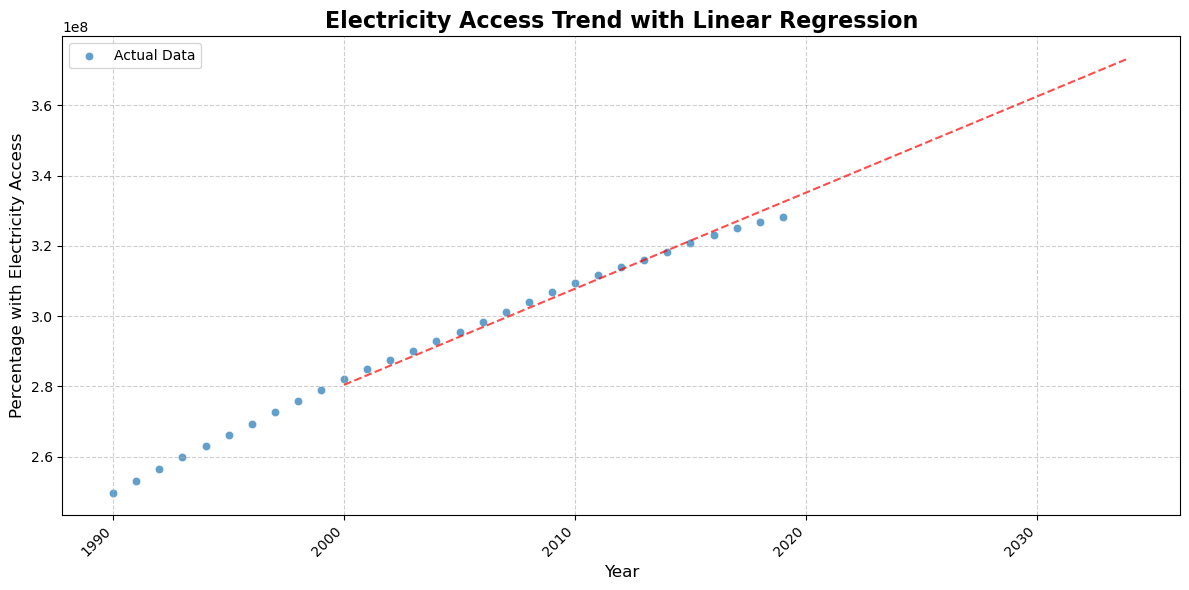

In [101]:
# Plot actual data and predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=global_df["Year"], y=global_df["Access_Percentage"], label="Actual Data", alpha=0.7)
plt.plot(future_years, predictions, color="red", linestyle="--", label="Linear Regression Trend", alpha=0.7, linewidth=1.5)

# Customize the plot
plt.title("Electricity Access Trend with Linear Regression", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage with Electricity Access", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [102]:
# Print the model's slope and intercept
print(f"Trend Slope (Rate of Improvement per Year): {model.coef_[0]:.2f}% per year")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Predicted access in 2030: {model.predict([[2030]])[0]:.2f}%")

Trend Slope (Rate of Improvement per Year): 2737370.63% per year
Intercept: -5194313283.69
Predicted access in 2030: 362549104.31%


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

In [115]:
# Filter global data
global_df = df[df["Entity"] == "United States"].copy()

In [116]:
# Feature Engineering
global_df["Year^2"] = global_df["Year"] ** 2  # Polynomial feature
global_df["Lag_1"] = global_df["Access_Percentage"].shift(1)  # Previous year's access
global_df["Lag_2"] = global_df["Access_Percentage"].shift(2)  # 2 years before

In [117]:
# Drop NaN values created by shift
global_df.dropna(inplace=True)

In [118]:
# Define features (X) and target (y)
X = global_df[["Year", "Year^2", "Lag_1", "Lag_2"]]
y = global_df["Access_Percentage"]

In [119]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
# 1. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [122]:
# 2. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [123]:
# 3. XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [124]:
# Predict future years (2021-2035)
future_years = np.arange(2021, 2036).reshape(-1, 1)
future_features = pd.DataFrame({"Year": future_years.flatten()})
future_features["Year^2"] = future_features["Year"] ** 2
future_features["Lag_1"] = y.iloc[-1]  # Last known value as lag
future_features["Lag_2"] = y.iloc[-2]  # Second last value as lag
future_scaled = scaler.transform(future_features)

In [125]:
# Make predictions
future_predictions_lr = lr_model.predict(future_scaled)
future_predictions_rf = rf_model.predict(future_features)
future_predictions_xgb = xgb_model.predict(future_features)

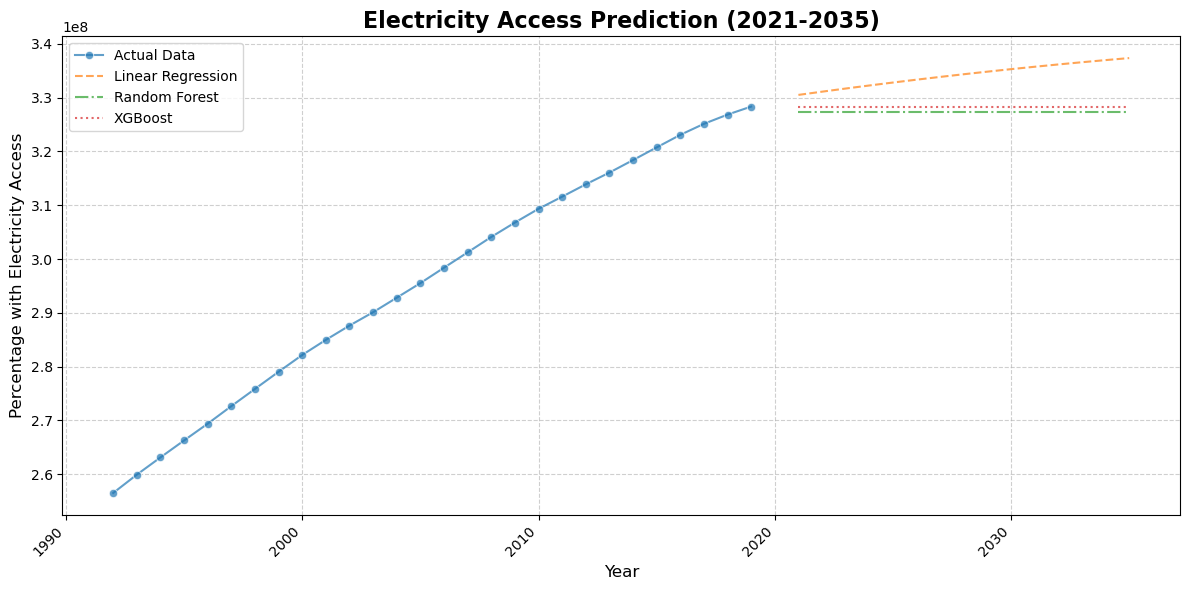

In [130]:
# Plot predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_df["Year"], y=global_df["Access_Percentage"], label="Actual Data", marker="o", alpha=0.7, linewidth=1.5)
sns.lineplot(x=future_years.flatten(), y=future_predictions_lr, label="Linear Regression", linestyle="--", alpha=0.7, linewidth=1.5)
sns.lineplot(x=future_years.flatten(), y=future_predictions_rf, label="Random Forest", linestyle="-.", alpha=0.7, linewidth=1.5)
sns.lineplot(x=future_years.flatten(), y=future_predictions_xgb, label="XGBoost", linestyle=":", alpha=0.7, linewidth=1.5)

# Customize plot
plt.title("Electricity Access Prediction (2021-2035)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage with Electricity Access", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [128]:
# Print 2030 predictions
print(f"Predicted electricity access in 2030 (Linear Regression): {future_predictions_lr[9]:.2f}%")
print(f"Predicted electricity access in 2030 (Random Forest): {future_predictions_rf[9]:.2f}%")
print(f"Predicted electricity access in 2030 (XGBoost): {future_predictions_xgb[9]:.2f}%")

Predicted electricity access in 2030 (Linear Regression): 335286100.78%
Predicted electricity access in 2030 (Random Forest): 327312329.05%
Predicted electricity access in 2030 (XGBoost): 328194272.00%


In [131]:
df = pd.read_csv("Data/electricity-access.csv", encoding='utf-8')

In [132]:
# Remove global data (focus on countries/regions)
df = df[df["Entity"] != "World"]

In [133]:
# Feature Engineering
df["Year^2"] = df["Year"] ** 2  # Polynomial feature
df["Lag_1"] = df.groupby("Entity")["With access to electricity"].shift(1)  # Previous year
df["Lag_2"] = df.groupby("Entity")["With access to electricity"].shift(2)  # Two years before

In [134]:
# Drop NaN values caused by lagging
df.dropna(inplace=True)

In [135]:
# Categorizing into "Low Access" and "High Access"
df["Access_Category"] = df["With access to electricity"].apply(lambda x: 0 if x < 80 else 1)

In [136]:
# Select features and target
X = df[["Year", "Year^2", "Lag_1", "Lag_2"]]
y = df["Access_Category"]

In [161]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
# 1. Logistic Regression (Baseline)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [164]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [165]:
# 3. XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

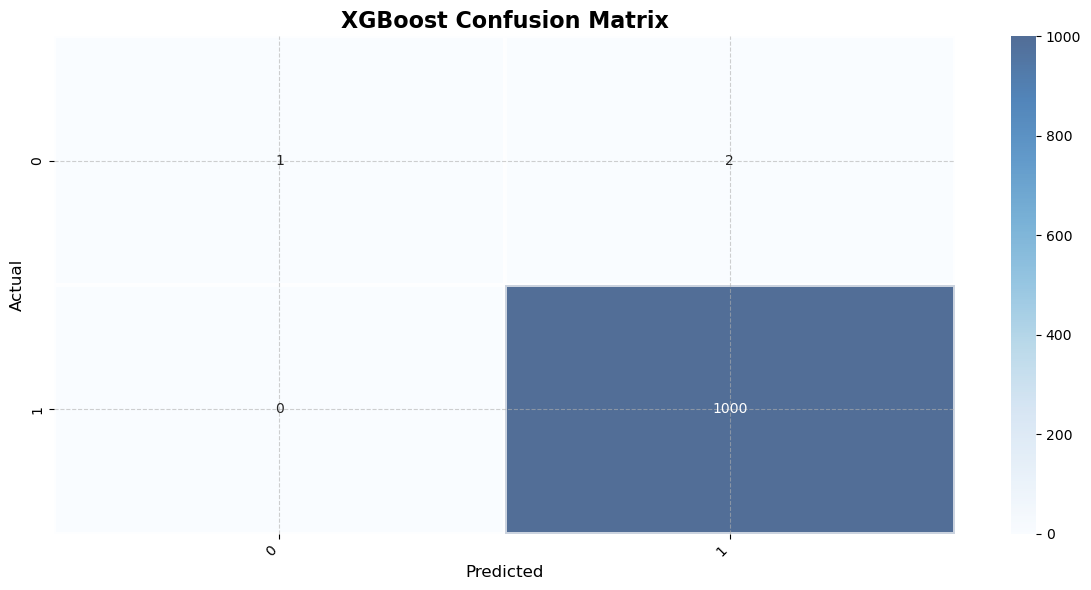

In [188]:
# Confusion Matrix Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt="d", cmap="Blues", alpha=0.7, linewidth=1.5)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("XGBoost Confusion Matrix", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

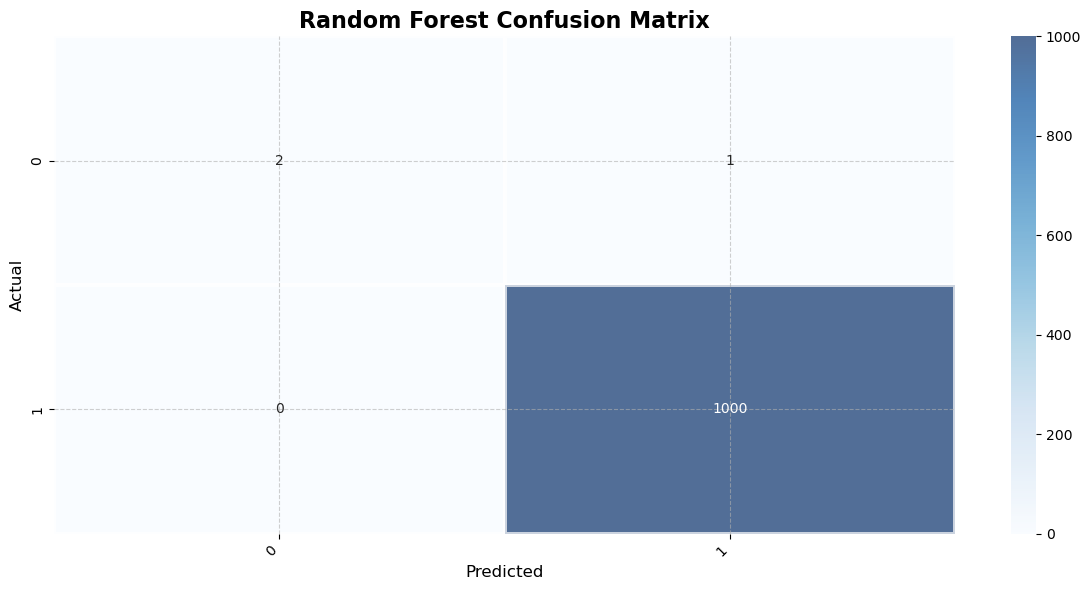

In [187]:
# Confusion Matrix Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Blues", alpha=0.7, linewidth=1.5)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Random Forest Confusion Matrix", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

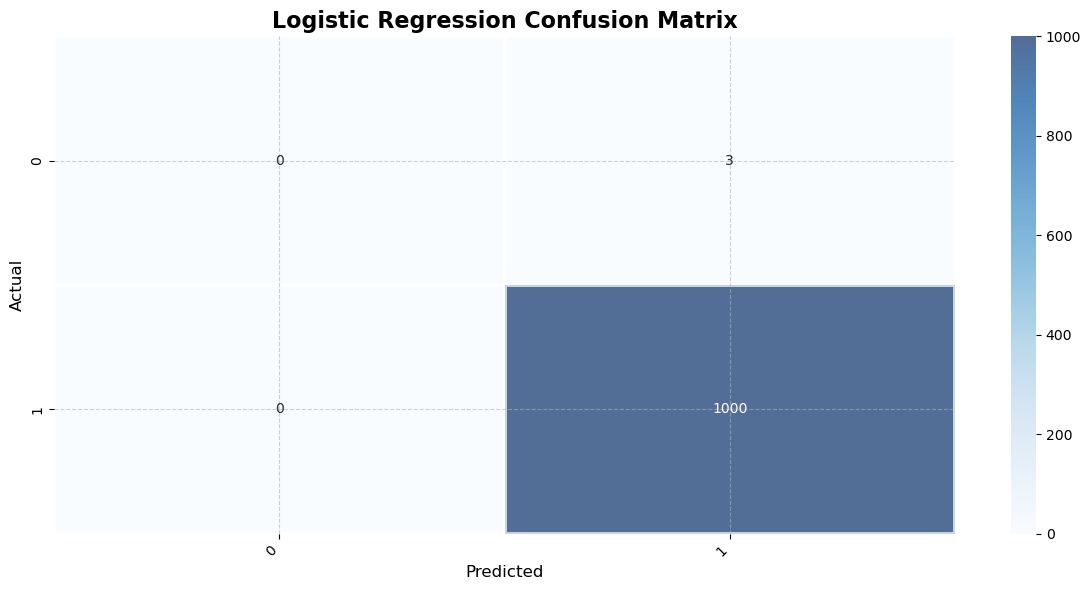

In [186]:
# Confusion Matrix Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", cmap="Blues", alpha=0.7, linewidth=1.5)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Logistic Regression Confusion Matrix", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [189]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [190]:
df = pd.read_csv("Data/electricity-access.csv", encoding='utf-8')

In [191]:
# Remove global/continent data
df = df[df["Entity"] != "World"]

In [192]:
# Pivot the dataset: Rows = Countries, Columns = Years
df_pivot = df.pivot(index="Entity", columns="Year", values="With access to electricity")

In [211]:
# Handle missing values by forward-filling (better for time series)
df_pivot.bfill(axis=1, inplace=True)

In [212]:
# Normalize data (Min-Max Scaling)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pivot)

In [213]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [214]:
# Convert PCA results into DataFrame
df_pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca_df["Country"] = df_pivot.index

In [215]:
# 🔹 1. K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_pca_df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [216]:
# 🔹 2. Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4)
df_pca_df["Cluster_Hierarchical"] = agglo.fit_predict(df_scaled)

In [217]:
# 🔹 3. DBSCAN (For outliers)
dbscan = DBSCAN(eps=1.5, min_samples=3)
df_pca_df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

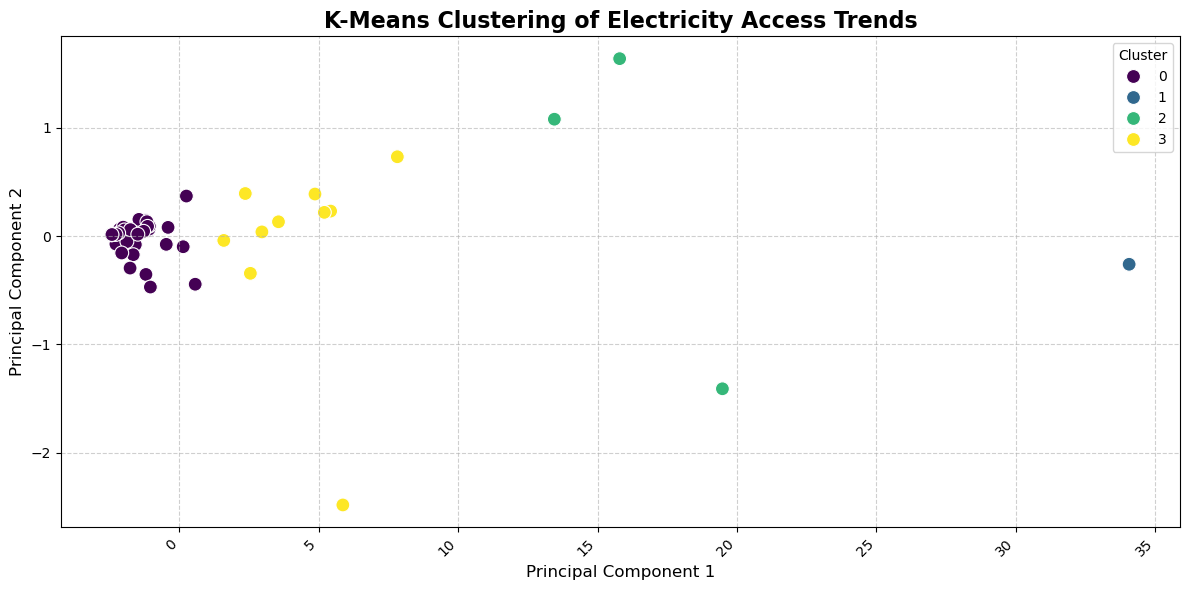

In [224]:
# 🎨 Plot K-Means Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_df, x="PC1", y="PC2", hue="Cluster_KMeans", palette="viridis", s=100)
plt.title("K-Means Clustering of Electricity Access Trends", fontsize=16, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

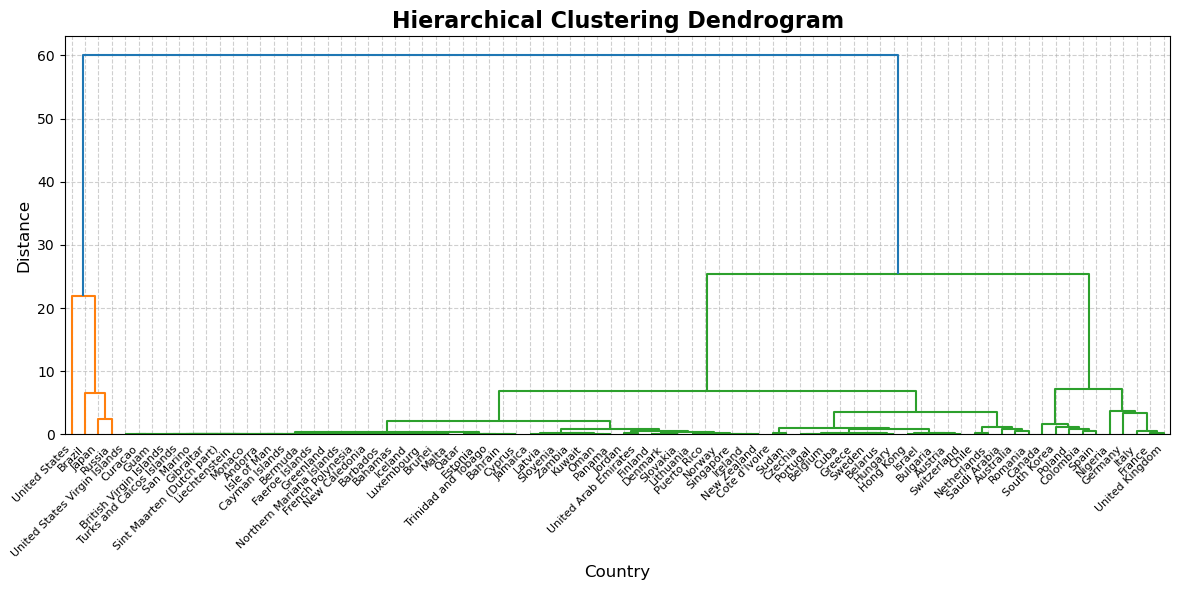

In [223]:
# 🎨 Plot Hierarchical Clustering Dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix, labels=df_pivot.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

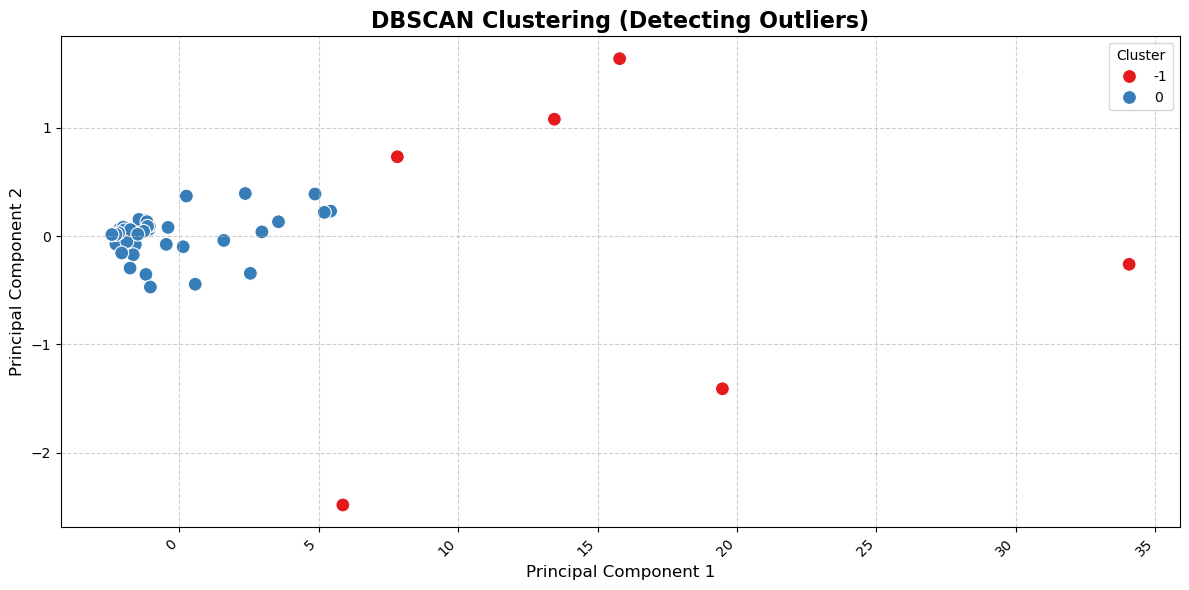

In [222]:
# 🎨 Plot DBSCAN Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_df, x="PC1", y="PC2", hue="Cluster_DBSCAN", palette="Set1", s=100)
plt.title("DBSCAN Clustering (Detecting Outliers)", fontsize=16, fontweight='bold')
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()

In [221]:
# 🔹 Show countries in each K-Means cluster
for cluster in sorted(df_pca_df["Cluster_KMeans"].unique()):
    print(f"\n📌 **Countries in Cluster {cluster} (K-Means):**\n", 
          df_pca_df[df_pca_df["Cluster_KMeans"] == cluster]["Country"].tolist())


📌 **Countries in Cluster 0 (K-Means):**
 ['Andorra', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Bermuda', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Cayman Islands', 'Chile', "Cote d'Ivoire", 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Faeroe Islands', 'Finland', 'French Polynesia', 'Gibraltar', 'Greece', 'Greenland', 'Guam', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Israel', 'Jamaica', 'Jordan', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Netherlands', 'New Caledonia', 'New Zealand', 'Northern Mariana Islands', 'Norway', 'Oman', 'Panama', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'San Marino', 'Saudi Arabia', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Sudan', 'Sweden', 'Switzerland', 'Trinidad and Tobago', 'Turks and Caicos Islands', 'United Arab Emirates', 'United States Virgin Islands', 'Zambia']

📌 **Countries in Cluster 1 (K-Means

In [240]:
from scipy.stats import zscore

In [236]:
df = pd.read_csv("Data/electricity-access.csv", encoding='utf-8')

In [237]:
# 🔹 Remove global/continent data
df = df[df["Entity"] != "World"]

In [238]:
# 🔹 Sort & Compute Year-over-Year Change
df.sort_values(by=["Entity", "Year"], inplace=True)
df["Yearly Change"] = df.groupby("Entity")["With access to electricity"].diff()

In [241]:
# 🔹 Z-Score Method (Detects Outliers Beyond ±3 Std Dev)
df["Z-Score"] = df.groupby("Entity")["Yearly Change"].transform(lambda x: zscore(x, nan_policy="omit"))

In [242]:
# 🔹 IQR Method (Detects Outliers Beyond 1.5x IQR)
Q1 = df["Yearly Change"].quantile(0.25)
Q3 = df["Yearly Change"].quantile(0.75)
IQR = Q3 - Q1
df["IQR Outlier"] = ((df["Yearly Change"] < (Q1 - 1.5 * IQR)) | (df["Yearly Change"] > (Q3 + 1.5 * IQR)))

In [243]:
# 🔹 Mark Anomalies (if Z-Score > 3 or IQR Outlier)
df["Anomaly"] = (abs(df["Z-Score"]) > 3) | df["IQR Outlier"]

In [244]:
# 🔹 Filter Only Anomalies
anomalies = df[df["Anomaly"]]

In [248]:
# 🔹 Smoothing: Rolling Average (5-year window)
df["Smoothed Access"] = df.groupby("Entity")["With access to electricity"].transform(lambda x: x.rolling(5, min_periods=1).mean())

In [253]:
# 🔹 Select Key Countries for Readability
top_countries = ["India", "Spain", "United States", "Japan", "United Kingdom", "China"]
df_filtered = df[df["Entity"].isin(top_countries)]
anomalies_filtered = anomalies[anomalies["Entity"].isin(top_countries)]

C:\Users\dell\AppData\Local\Temp\ipykernel_14164\3989223505.py:18: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.



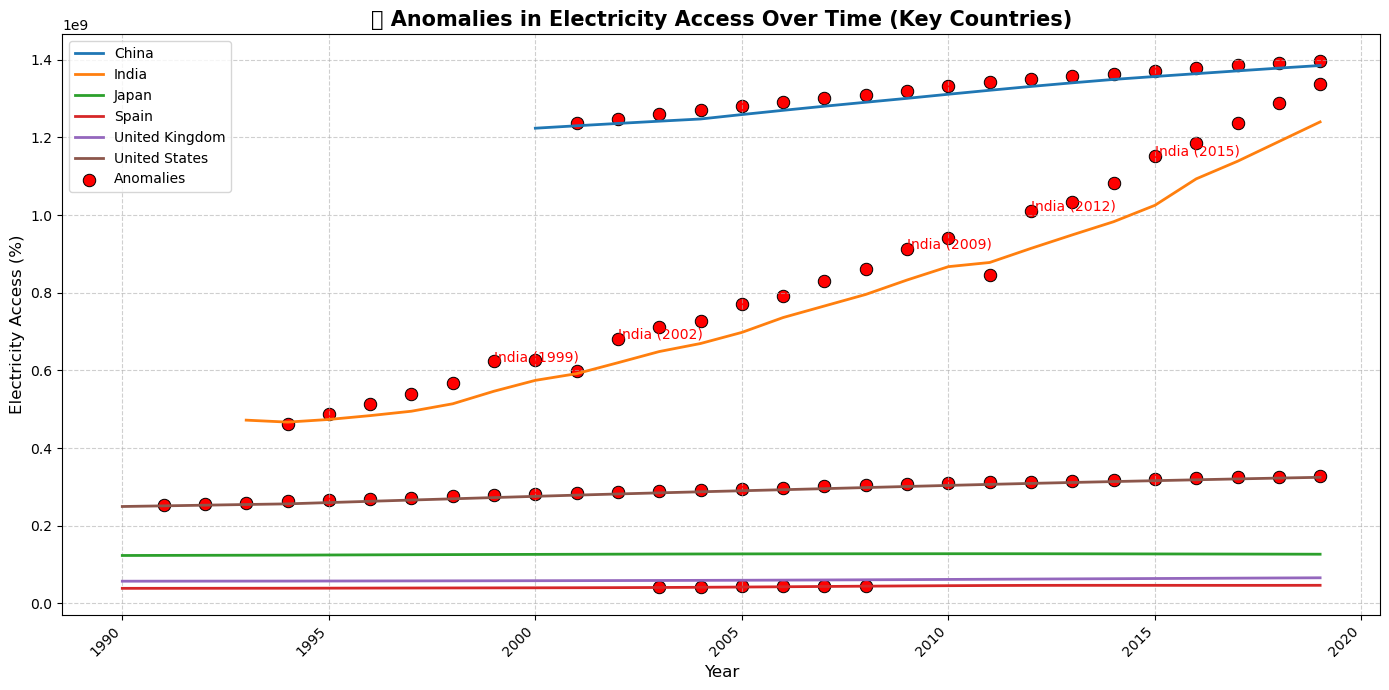

In [254]:
# 🔹 Visualization: Highlight Anomalies on a Smoothed Time Series Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x="Year", y="Smoothed Access", hue="Entity", linewidth=2, palette="tab10")

# 🔹 Highlight Anomalies
sns.scatterplot(data=anomalies_filtered, x="Year", y="With access to electricity", color="red", label="Anomalies", edgecolor="black", s=80)

# 🔹 Annotate Top 5 Anomalies
for index, row in anomalies_filtered.sort_values("Yearly Change", ascending=False).head(5).iterrows():
    plt.text(row["Year"], row["With access to electricity"] + 1, f"{row['Entity']} ({row['Year']})", fontsize=10, color="red", ha="left")

plt.title("📉 Anomalies in Electricity Access Over Time (Key Countries)", fontsize=15, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Electricity Access (%)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)  # Improved grid
plt.xticks(rotation=45, ha='right') #Rotate x-axis labels
plt.tight_layout()
plt.show()